# Opening files

In [ ]:
first_lines = []

with open("dataset.txt", "r") as file:
    for i in range(5):
        first_lines.append(file.readline())

print(first_lines)

In [ ]:
with open("dataset.txt", "r") as file:
    count = 0
    for line in file:
        count += 1
count

33372416

In [ ]:
subset_lines = []

with open("dataset.txt", "r") as file:
    for i in range(100000):
        subset_lines.append(file.readline().strip())

with open("subset_dataset.txt", "w") as file:
    for line in subset_lines:
        file.write(line + "\n")

In [ ]:
train_set = []

with open("dataset.txt", "r") as file:
    i = 0
    for line in file:
        i += 1
        if i > 1_000_000:
            break
        train_set.append(line.strip())

# HAL

In [26]:
import numpy as np
from collections import Counter

In [ ]:
def get_new_matrix(matrix):
    n = matrix.shape[0]

    new_matrix = np.zeros((n, 2 * n), dtype=np.float32)

    for i in range(n):
        row = matrix[i, :]
        column = matrix[:, i]

        new_row = np.concatenate((row, column))

        new_matrix[i] = new_row
    return new_matrix


def normalize_matrix(matrix):
    row_sums = matrix.sum(axis=1)

    row_sums = row_sums.reshape(-1, 1)

    normalized_matrix = matrix / row_sums

    return normalized_matrix

In [ ]:
def hal(sentences, window_size, min_occurrences=1):
    word_counter = Counter()
    sentences = [s.lower() for s in sentences]

    for string in sentences:
        word_counter.update(string.split())

    vocab = set([k for k, v in word_counter.items() if v >= min_occurrences])
    vocab = sorted(vocab)

    vocab_size = len(vocab)
    hal_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)
    vocab_index = {word: i for i, word in enumerate(vocab)}

    cont = 0
    for s in sentences:
        tokens = s.split()
        len_sentence = len(tokens)
        for curr_i in range(len_sentence):
            for less_i in range(1, window_size + 1):
                before_i = curr_i - less_i
                if before_i < 0:
                    break
                try:
                    curr_word = tokens[curr_i]
                    before_word = tokens[before_i]
                    score = window_size - less_i + 1
                    hal_matrix[vocab_index[curr_word]][
                        vocab_index[before_word]
                    ] += score
                except:
                    continue

    vocab_vectors = normalize_matrix(get_new_matrix(hal_matrix))

    return hal_matrix, vocab, vocab_vectors


sentence = ["O João comeu o bolo do Miguel"]
window_size = 5

hal_matrix, vocab, vocab_vectors = hal(sentence, window_size)

print("HAL Matrix:")
print(hal_matrix)

print("\nVocabulary:")
print(vocab)

print("\nVocabulary vectors:")
print(vocab_vectors)

HAL Matrix:
[[0. 4. 0. 3. 0. 7.]
 [0. 0. 0. 5. 0. 4.]
 [5. 3. 0. 2. 0. 5.]
 [0. 0. 0. 0. 0. 5.]
 [4. 2. 5. 1. 0. 3.]
 [0. 5. 0. 4. 0. 3.]]

Vocabulary:
['bolo', 'comeu', 'do', 'joão', 'miguel', 'o']

Vocabulary vectors:
[[0.         0.17391305 0.         0.13043478 0.         0.3043478
  0.         0.         0.2173913  0.         0.17391305 0.        ]
 [0.         0.         0.         0.2173913  0.         0.17391305
  0.17391305 0.         0.13043478 0.         0.08695652 0.2173913 ]
 [0.25       0.15       0.         0.1        0.         0.25
  0.         0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.         0.25
  0.15       0.25       0.1        0.         0.05       0.2       ]
 [0.26666668 0.13333334 0.33333334 0.06666667 0.         0.2
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.12820514 0.         0.1025641  0.         0.07692308
  0.17948718 0.1025641  0.12820514 0.12820514 0

# HAL SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD


def hal_svd(sentences, window_size, min_occurrences=1):
    word_counter = Counter()
    sentences = [s.lower() for s in sentences]

    for string in sentences:
        word_counter.update(string.split())

    vocab = set([k for k, v in word_counter.items() if v >= min_occurrences])
    vocab = sorted(vocab)

    vocab_size = len(vocab)
    hal_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)
    vocab_index = {word: i for i, word in enumerate(vocab)}

    cont = 0
    for s in sentences:
        tokens = s.split()
        len_sentence = len(tokens)
        for curr_i in range(len_sentence):
            for less_i in range(1, window_size + 1):
                before_i = curr_i - less_i
                if before_i < 0:
                    break
                try:
                    curr_word = tokens[curr_i]
                    before_word = tokens[before_i]
                    score = window_size - less_i + 1
                    hal_matrix[vocab_index[curr_word]][
                        vocab_index[before_word]
                    ] += score
                except:
                    continue
    svd = TruncatedSVD(n_components=300)
    vocab_vectors = svd.fit_transform(hal_matrix)

    return hal_matrix, vocab, vocab_vectors

In [30]:
hal_matrix, vocab, vocab_vectors = hal(train_set, 5, 300)

print("HAL Matrix:")
print(hal_matrix.shape)

print("\nVocabulary:")
print(vocab)

print("\nVocabulary vectors:")
print(vocab_vectors.shape)

HAL Matrix:
(4982, 4982)

Vocabulary:
['0', '00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '1', '10', '100', '11', '110', '12', '120', '125', '13', '130', '14', '140', '15', '150', '1500', '16', '17', '18', '180', '19', '1998', '1999', '1º', '2', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2030', '21', '22', '23', '24', '25', '250', '26', '27', '28', '29', '3', '30', '300', '31', '32', '33', '34', '35', '350', '36', '37', '38', '39', '4', '40', '400', '41', '42', '43', '44', '45', '450', '46', '47', '48', '49', '5', '50', '500', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '600', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '700', '71', '72', '73', '74', '75', '750', '76', '77', '78', '79', '8', '80', '800', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '

In [ ]:
vocab_vectors_2 = np.load("vectors-vocab.npy")  # with SVD
vocab_2 = np.load("vocab.npy").tolist()  # with SVD

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity



def most_similar(word, vocab, vocab_vectors, n=5):
    word_index = vocab.index(word)
    word_vector = vocab_vectors[word_index]
    similarities = cosine_similarity([word_vector], vocab_vectors)[0]
    most_similar_indices = np.argsort(similarities)[-n - 1 : -1][::-1]
    return [vocab[i] for i in most_similar_indices]

In [ ]:
word = vocab[np.random.randint(0, len(vocab))]
most_similar_words = most_similar(word, vocab, vocab_vectors, n=5)
most_similar_words_2 = most_similar(word, vocab_2, vocab_vectors_2, n=5)

print(f"(HAL) The 5 words most similar to '{word}' are: {most_similar_words}")
print(f"(SVD) The 5 words most similar to '{word}' are: {most_similar_words_2}")

(HAL) The 5 words most similar to 'aquecimento' are: ['pacto', 'votação', 'montante', 'temperatura', 'limitar']
(SVD) The 5 words most similar to 'aquecimento' are: ['poluição', 'fenómenos', 'desflorestação', 'eficaz', 'padrões']


In [60]:
# (HAL) The 5 words most similar to 'eurodeputados' are: ['emigrantes', 'empresários', 'bancos', 'artistas', 'filmes']
# (SVD) The 5 words most similar to 'eurodeputados' are: ['deputados', 'hemiciclo', 'votação', 'estrasburgo', 'parlamentos']

# (HAL) The 5 words most similar to 'aquecimento' are: ['pacto', 'votação', 'montante', 'temperatura', 'limitar']
# (SVD) The 5 words most similar to 'aquecimento' are: ['poluição', 'fenómenos', 'desflorestação', 'eficaz', 'padrões']

In [ ]:
def word_arithmetic(a, b, c, vocab, vocab_vectors, n=5):
    a_index = vocab.index(a)
    b_index = vocab.index(b)
    c_index = vocab.index(c)

    a_vector = vocab_vectors[a_index]
    b_vector = vocab_vectors[b_index]
    c_vector = vocab_vectors[c_index]

    result_vector = a_vector - b_vector + c_vector

    similarities = cosine_similarity([result_vector], vocab_vectors)[0]

    top_n_indices = np.argsort(similarities)[-n:]

    return [vocab[i] for i in reversed(top_n_indices)]

In [ ]:
result_word = word_arithmetic("rei", "rainha", "mulher", vocab, vocab_vectors)
print(f"'rei' - 'homem' + 'mulher' = {result_word}")

'rei' - 'homem' + 'mulher' = ['mulher', 'esposa', 'fugiu', 'cunhado', 'empregado']


# Trying some kind of glove

In [ ]:
def coocc_matrix(sentences, window_size, min_occurrences=1):
    word_counter = Counter()
    sentences = [s.lower() for s in sentences]

    for string in sentences:
        word_counter.update(string.split())

    vocab = set([k for k, v in word_counter.items() if v >= min_occurrences])
    vocab = sorted(vocab)

    vocab_size = len(vocab)
    hal_matrix = np.zeros((vocab_size, vocab_size), dtype=np.float32)
    word_to_idx = {word: i for i, word in enumerate(vocab)}
    idx_to_word = {i: word for i, word in enumerate(vocab)}

    for s in sentences:
        tokens = s.split()
        len_sentence = len(tokens)
        for curr_i in range(len_sentence):
            for less_i in range(1, window_size + 1):
                before_i = curr_i - less_i
                if before_i < 0:
                    break
                try:
                    curr_word = tokens[curr_i]
                    before_word = tokens[before_i]
                    score = window_size - less_i + 1
                    hal_matrix[word_to_idx[curr_word]][
                        word_to_idx[before_word]
                    ] += score
                except:
                    continue

    return hal_matrix, vocab, word_to_idx, idx_to_word

In [266]:
occ_matrix, vocab, word_to_idx, idx_to_word = coocc_matrix(train_set, 5, 200)

In [267]:
occ_matrix.shape, len(vocab)

((6796, 6796), 6796)

In [ ]:
X_train = []
len_matrix = len(occ_matrix)
for i in range(len_matrix):
    for j in range(len_matrix):
        if occ_matrix[i][j] > 50:
            X_train.append([i, j, np.log10(occ_matrix[i][j])])

In [276]:
len(X_train)

160670

In [ ]:
def sgd_method(X_train, k, ld, lr, epochs, vocab_size):
    M = np.random.rand(vocab_size, k)
    M /= np.sum(M, axis=1).reshape(-1, 1)

    U = np.random.rand(vocab_size, k)
    U /= np.sum(U, axis=1).reshape(-1, 1)

    for ep in range(epochs + 1):
        total_err = 0
        for i, j, r in X_train:
            qi, pj = M[i], U[j]

            eij = r - np.dot(qi, pj)
            total_err += eij**2
            M[i] = qi + lr * (eij * pj - ld * qi)
            U[j] = pj + lr * (eij * qi - ld * pj)
        if ep % 1 == 0:
            print(f"Error: {total_err:.4f}")
    return M, U

In [ ]:
def continue_training(X_train, k, ld, lr, epochs, M, U):
    for ep in range(epochs + 1):
        total_err = 0
        for i, j, r in X_train:
            qi, pj = M[i], U[j]

            eij = r - np.dot(qi, pj)
            total_err += eij**2
            M[i] = qi + lr * (eij * pj - ld * qi)
            U[j] = pj + lr * (eij * qi - ld * pj)
        if ep % 1 == 0:
            print(f"Error: {total_err:.4f}")
    return M, U

In [ ]:
M, U = sgd_method(X_train, k=200, lr=0.01, ld=1e-3, epochs=50, vocab_size=len(vocab))

In [ ]:
M, U = continue_training(X_train, k=200, lr=0.1, ld=1e-3, epochs=50, M=M, U=U)

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


def get_similar_words(query_word, embeddings, word_to_index, index_to_word, top_k=5):

    query_idx = word_to_index[query_word]
    query_embedding = embeddings[query_idx]

    similarities = cosine_similarity([query_embedding], embeddings)

    similarities = similarities.flatten()

    top_k_idx = np.argsort(similarities)[::-1][
        1 : top_k + 1
    ]  

    similar_words = [(index_to_word[idx], similarities[idx]) for idx in top_k_idx]

    return similar_words


def find_closest_words(
    embeddings, word_to_idx, idx_to_word, positive=[], negative=[], topn=5
):
    positive_vectors = [embeddings[word_to_idx[word]] for word in positive]
    negative_vectors = [embeddings[word_to_idx[word]] for word in negative]

    result_vector = np.sum(positive_vectors, axis=0) - np.sum(negative_vectors, axis=0)

    result_vector /= np.linalg.norm(result_vector)

    dot_products = np.dot(embeddings, result_vector)

    closest_indices = np.argpartition(dot_products, -topn)[-topn:]
    closest_tuples = [(idx_to_word[i], dot_products[i]) for i in closest_indices]
    closest_tuples.sort(key=lambda x: x[1], reverse=True)

    return closest_tuples

In [ ]:
M_norm = M / np.linalg.norm(M, axis=1).reshape((-1, 1))

In [349]:
word = vocab[np.random.randint(0, len(vocab))]
similar_words = get_similar_words(word, M_norm, word_to_idx, idx_to_word, top_k=5)
print(word, similar_words)

alertam [('defendem', 0.9606735307691576), ('debatem', 0.9496011247455336), ('arquiteto', 0.9450756528710658), ('localização', 0.9443703450989965), ('divórcio', 0.9432927552593505)]


In [ ]:
result = find_closest_words(
    M_norm,
    word_to_idx,
    idx_to_word,
    positive=["rei", "mulher"],
    negative=["homem"],
    topn=5,
)
for word, similarity in result:
    print(f"{word}: {similarity}")

mulher: 0.7642174689348
rei: 0.6780250597861164
pedra: 0.6757663143514961
governador: 0.6756950238675921
irmão: 0.6751539252244784


# Graphs

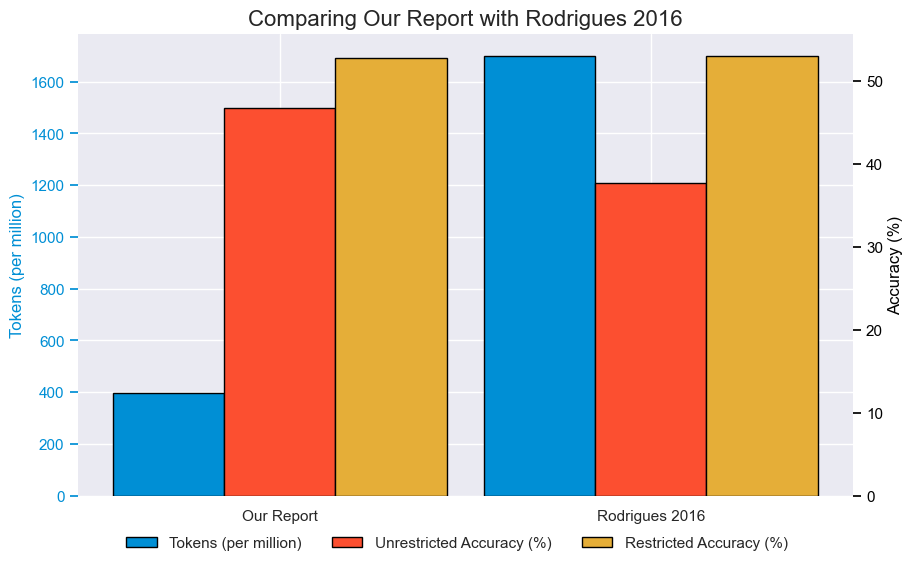

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


reports = ["Our Report", "Rodrigues 2016"]
tokens = [394.82548, 1700]
unrestricted = [46.7, 37.7]
restricted = [52.7, 53]

bar_width = 0.3
r1 = np.arange(len(tokens))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Create Bars for Tokens
bars1 = ax1.bar(
    r1,
    tokens,
    color="#008fd5",
    width=bar_width,
    label="Tokens (per million)",
    edgecolor="black",
    capstyle="round",
)
ax1.set_ylabel("Tokens (per million)", fontsize=12, color="#008fd5")
ax1.tick_params(axis="y", colors="#008fd5")


ax2 = ax1.twinx()

bars2 = ax2.bar(
    r2,
    unrestricted,
    color="#fc4f30",
    width=bar_width,
    label="Unrestricted Accuracy (%)",
    edgecolor="black",
    capstyle="round",
)
bars3 = ax2.bar(
    r3,
    restricted,
    color="#e5ae38",
    width=bar_width,
    label="Restricted Accuracy (%)",
    edgecolor="black",
    capstyle="round",
)
ax2.set_ylabel("Accuracy (%)", fontsize=12, color="black")
ax2.tick_params(axis="y", colors="black")

plt.xticks([r + bar_width for r in range(len(tokens))], reports, fontsize=12)
plt.title("Comparing Our Report with Rodrigues 2016", fontsize=16)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
fig.legend(handles, labels, loc="lower center", ncol=3, frameon=False)

for ax in [ax1, ax2]:
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.grid(False)
plt.savefig("comparison.pdf", bbox_inches="tight")
plt.show()